# 로봇 관련 기사 크롤링 데이터 파일 읽어들이기

In [1]:
import pandas as pd
df=pd.read_csv("../../data/eda_project/robot_2023.csv", sep = ",")
df

,date,title,text
0,2023-01-01 00:05:03,퇴근 않는 로봇 이길 수 있겠어요 당신의 미래 생존법,인터뷰 빅데이터 분석가 송길영 바이브컴퍼니 부사장 2023년 키워드는 변화의 가속...
1,2023-01-01 02:17:50,돌아온 토종 로봇 만화 손자 또래 독자도 본다,앵커 45년 전 소년들의 마음을 설레게 했던 토종 만화 로보트 킹 이 다시 돌아왔...
2,2023-01-01 20:03:01,마산로봇랜드 3년째 취약계층을 위한 기부금 전달,연말연시 맞아 로봇랜드 임직원 일동 기부금 모금해 마산애육원에 전달 마산로봇랜드 제...
3,2023-01-01 10:51:15,올해 자산 배분 중요성 커져 신재생에너지 로봇 ETF 주목,경기침체 상황 속 기업 옥석 가리기 시작 기준금리 인상이 중단되고 경기침체가 본격...
4,2023-01-01 06:10:21,과학 한스푼 깜놀 대형 벌레인 줄 벽 천장 종횡무진 로봇 등장,수직면에서 속도 최대 70 s 천장에선 50 s 자석 이용 발바닥에 고무 적용해 미...
...,...,...,...
9333,2023-12-27 05:30:02,교육이 미래다 햅틱스부터 로봇 분야까지 혁신적 융합연구로 미래기술 선도,상상을 현실로 바꾸는 융합연구 한국기술교육대 김상연 교수 성과 업적 시각장애인 길 ...
9334,2023-12-30 03:02:02,비행기 조종석서 엄지 척 세계 첫 로봇조종사,세계 첫 휴머노이드 파일럿 2026년엔 비행기 조종 장련성 기자 지난 22일 심현철...
9335,2023-12-26 11:22:17,허경수 코스모 회장 로봇사업 지휘 2025년 상장,서울 뉴시스 허경수 코스모그룹 회장 2023 11 27 photo newsis c...
9336,2023-12-26 18:18:08,30kg 드는 협동로봇 산업서 수요 과도 협력 기대,킴 포블슨 유니버설 로봇 CEO 서면인터뷰 최근 UR30 공개 내년 6월 양산 돌입...


# 1. 종목별 가장 많이 나오는 기업명 찾기
---
## 해당 분야별 기업리스트 추출
- 테마에 따라서 나눠놓은 파일 읽어들이기

In [2]:
# 0: 전기차, 1: 제약, 2: 로봇, 3: 반도체
thema = pd.read_excel("../../data/thema_and_stocks.xlsx")
thema.drop("Unnamed: 0", axis = 1, inplace=True)
thema

,테마,종목명
0,전기차,"['포스코퓨처엠', '대양금속', '켐트로닉스', '포스코인터내셔널', '코스모화학..."
1,제약,"['녹십자홀딩스', 'KC코트렐', '메디아나', '큐라티스', '엘앤씨바이오', ..."
2,로봇,"['티쓰리', '대동', '알에프세미', '제주항공', '삼성에스디에스', '링크제..."
3,반도체,"['태경산업', '에이엘티', '상아프론테크', '파인텍', '동운아나텍', '알에..."


In [3]:
# thema.set_index("테마", inplace=True)

company_list = []
for t in thema["종목명"]:
    t = t.replace("'", "")
    t = t.replace("]", "")
    t = t.replace("[", "")
    t = t.split(", ")
    company_list.append(t)
    

thema["종목명"] = company_list

# ex) 로봇 산업
thema.iloc[2]["종목명"]

['티쓰리',
 '대동',
 '알에프세미',
 '제주항공',
 '삼성에스디에스',
 '링크제니시스',
 '스맥',
 '아진엑스텍',
 '로보티즈',
 '쎄트렉아이',
 '카카오',
 '넥센타이어',
 '유진로봇',
 '컨텍',
 '서암기계공업',
 '기산텔레콤',
 '해성티피씨',
 '한화',
 '라온피플',
 '오픈베이스',
 '베셀',
 '케이피에프',
 '에스비비테크',
 '에스피지',
 '스마트레이더시스템',
 '파이버프로',
 '한양이엔지',
 '큐렉소',
 '현대무벡스',
 '유일로보틱스',
 '태웅',
 '티로보틱스',
 '고영',
 '러셀',
 '포메탈',
 '영우디에스피',
 '휴림로봇',
 'KT',
 '덕산하이메탈',
 '크라우드웍스',
 '한국항공우주',
 '한빛소프트',
 '인텔리안테크',
 '대한항공',
 '로보스타',
 '이랜시스',
 '싸이맥스',
 '모아데이타',
 '가온그룹',
 '비츠로테크',
 '코난테크놀로지',
 '디티앤씨',
 '두산로보틱스',
 'GS',
 'LIG넥스원',
 '퍼스텍',
 '디아이씨',
 '코닉오토메이션',
 '와이더플래닛',
 '솔트룩스',
 '인지컨트롤스',
 '남성',
 '뉴로메카',
 '켄코아에어로스페이스',
 '한컴위드',
 '네패스',
 '엑셈',
 '현대차',
 '티라유텍',
 '한글과컴퓨터',
 '에스에프에이',
 '한국전자인증',
 '로보로보',
 'SK텔레콤',
 '엠씨넥스',
 '휴림네트웍스',
 '오브젠',
 '대동기어',
 '마음AI',
 'LG유플러스',
 '삼익THK',
 '핀텔',
 '우림피티에스',
 '서연이화',
 '아이엠',
 '매커스',
 '알체라',
 '네오펙트',
 '브레인즈컴퍼니',
 '네온테크',
 '에브리봇',
 '인탑스',
 '한국카본',
 '현대건설',
 '줌인터넷',
 '비플라이소프트',
 '인포마크',
 '제우스',
 'LG전자',
 '하이즈항공',
 'AP위성',
 '씨유박스',
 '제이씨현시스템',
 '현대로템',
 '이수페타시스',
 '푸른기술'

## 해당 기업에 대한 뉴스 추출

In [4]:
# 기업의 이름이 있는 기사를 기업별로 분류해놓은 리스트 생성
# 뉴스에 기업이 없는 경우도 있기 때문에 빈 칸 있을 수 있음

company_index = []
for company in thema.iloc[2]["종목명"]:
    inner = []
    for idx, article in enumerate(df["text"]):
        if company in article:
            inner.append(True)
        else:
            inner.append(False)
    company_index.append(inner)
    
company_distinct_list = []
for i, keyward in enumerate(thema.iloc[2]["종목명"]):
    company_distinct_list.append(df.loc[company_index[i]])

# 빈칸이 아닌 기업들의 뉴스만 따로 모아놓음
# 기업명, 기업이름이 기사에 들어가있는 기사, 기업명의 인덱스
com = []
for i, row in enumerate(company_distinct_list):
    inner = []
    if row.empty:
        pass
    else:
        inner.append(thema.iloc[2]["종목명"][i]) 
        inner.append(row)
        inner.append(len(row))
        com.append(inner)
len(com)
# fbprophet

99

In [5]:
# 해당 기업의 뉴스가 얼마나 많이 나왔는지 카운팅

comp = []
no_article = []
for company in com:
    comp.append(company[0])
    no_article.append(company[2])
    
ddf1 = pd.DataFrame(index = comp, data = no_article, columns=["no_article"])
ddf1.sort_values("no_article", ascending=False, inplace=True)
ddf1.head(5)

,no_article
KT,551
두산,548
LG전자,530
카카오,499
레인보우로보틱스,494


## 반도체, 전기차에도 같은 방식 적용

In [7]:
df=pd.read_csv("../../data/eda_project/2023_EV.csv", sep = ",")
df.dropna(inplace=True)

In [9]:
# 전기차 기업
thema.iloc[0]["종목명"]

['포스코퓨처엠',
 '대양금속',
 '켐트로닉스',
 '포스코인터내셔널',
 '코스모화학',
 '엔시스',
 '대창스틸',
 '네오오토',
 '신세계 I&C',
 '대우부품',
 '디젠스',
 'DB하이텍',
 '나인테크',
 'STX',
 '에스엠벡셀',
 'SG&G',
 '동원금속',
 '알티캐스트',
 '아이에스동서',
 '코이즈',
 '효성첨단소재',
 '유니크',
 '우리산업',
 '탑머티리얼',
 '다이나믹디자인',
 '남선알미늄',
 'BGF에코머티리얼즈',
 '포스코스틸리온',
 '삼화전자',
 '라닉스',
 '한화솔루션',
 'MDS테크',
 '유일에너테크',
 '한주라이트메탈',
 '유성기업',
 '세동',
 '동아화성',
 '대성파인텍',
 '와이엠',
 '미래나노텍',
 '티에이치엔',
 '우신시스템',
 '티에스아이',
 '네오티스',
 '에이에프더블류',
 '조광페인트',
 'GH신소재',
 'KB오토시스',
 '삼성SDI',
 '디아이씨',
 '유라테크',
 'LG헬로비전',
 '에코바이오',
 '윤성에프앤씨',
 '고려아연',
 '파워넷',
 '엔케이',
 '보성파워텍',
 '금양',
 '금호타이어',
 '화신',
 '코오롱플라스틱',
 '비나텍',
 '금호석유',
 'SG글로벌',
 '효성티앤씨',
 '글로벌에스엠',
 '일진하이솔루스',
 '인탑스',
 '엘앤에프',
 '황금에스티',
 'SJM',
 '디와이',
 '삼양사',
 '오션브릿지',
 '파트론',
 '화승알앤에이',
 '한국단자',
 '엠투엔',
 'LX인터내셔널',
 '현대위아',
 '케이엔에스',
 '원익피앤이',
 '율촌화학',
 'SK아이이테크놀로지',
 '성일하이텍',
 '나노팀',
 '신성델타테크',
 '미래컴퍼니',
 '에코앤드림',
 '원익머트리얼즈',
 '기아',
 'LS ELECTRIC',
 '아이윈',
 '인화정공',
 '솔브레인홀딩스',
 '재영솔루텍',
 '솔루스첨단소재',
 '삼보모터스',
 '필에너지',
 '한일단조',
 '성안',
 '아

In [10]:
# 기업의 이름이 있는 기사를 기업별로 분류해놓은 리스트 생성
# 뉴스에 기업이 없는 경우도 있기 때문에 빈 칸 있을 수 있음
company_index = []
for company in thema.iloc[0]["종목명"]:
    inner = []
    for idx, article in enumerate(df["text"]):
        if company in article:
            inner.append(True)
        else:
            inner.append(False)

        
    company_index.append(inner)
    
company_distinct_list = []
for i, keyward in enumerate(thema.iloc[0]["종목명"]):
    company_distinct_list.append(df.loc[company_index[i]])

# 빈칸이 아닌 기업들의 뉴스만 따로 모아놓음
# 기업명, 기업이름이 기사에 들어가있는 기사, 기업명의 인덱스
com = []
for i, row in enumerate(company_distinct_list):
    inner = []
    if row.empty:
        pass
    else:
        inner.append(thema.iloc[0]["종목명"][i]) 
        inner.append(row)
        inner.append(len(row))
        com.append(inner)
len(com)
# fbprophet

227

In [12]:
# 해당 기업의 뉴스가 얼마나 많이 나왔는지 카운팅

comp = []
no_article = []
for company in com:
    comp.append(company[0])
    no_article.append(company[2])
    
ddf2 = pd.DataFrame(index = comp, data = no_article, columns=["no_article"])
ddf2.sort_values("no_article", ascending=False, inplace=True)
ddf2.head(5)

,no_article
현대차,3266
기아,2677
SK,1224
LG에너지솔루션,935
삼성SDI,546


---

In [13]:
# 반도체

df=pd.read_csv("../../data/eda_project/2023_semi.csv", sep = ",")
df.dropna(inplace=True)


# 종목별 기업 이름 리스트로 변환
# 0: 전기차, 1: 제약, 2: 로봇, 3: 반도체
thema = pd.read_excel("../../data/thema_and_stocks.xlsx")

# thema.set_index("테마", inplace=True)
thema.drop("Unnamed: 0", axis = 1, inplace=True)
company_list = []
for t in thema["종목명"]:
    t = t.replace("'", "")
    t = t.replace("]", "")
    t = t.replace("[", "")
    t = t.split(", ")
    company_list.append(t)
    

thema["종목명"] = company_list
thema.iloc[3]["종목명"]

# 기업의 이름이 있는 기사를 기업별로 분류해놓은 리스트 생성
# 뉴스에 기업이 없는 경우도 있기 때문에 빈 칸 있을 수 있음
company_index = []
for company in thema.iloc[3]["종목명"]:
    inner = []
    for idx, article in enumerate(df["text"]):
        if company in article:
            inner.append(True)
        else:
            inner.append(False)

        
    company_index.append(inner)
    
company_distinct_list = []
for i, keyward in enumerate(thema.iloc[3]["종목명"]):
    company_distinct_list.append(df.loc[company_index[i]])

# 빈칸이 아닌 기업들의 뉴스만 따로 모아놓음
# 기업명, 기업이름이 기사에 들어가있는 기사, 기업명의 인덱스
com = []
for i, row in enumerate(company_distinct_list):
    inner = []
    if row.empty:
        pass
    else:
        inner.append(thema.iloc[3]["종목명"][i]) 
        inner.append(row)
        inner.append(len(row))
        com.append(inner)
len(com)
# fbprophet
# 해당 기업의 뉴스가 얼마나 많이 나왔는지 카운팅

comp = []
no_article = []
for company in com:
    comp.append(company[0])
    no_article.append(company[2])
    
ddf3 = pd.DataFrame(index = comp, data = no_article, columns=["no_article"])
ddf3.sort_values("no_article", ascending=False, inplace=True)
ddf3.head(5)

,no_article
삼성전자,6379
SK하이닉스,3948
테스,810
상보,629
한미반도체,378


/tmp/ipykernel_14174/2033562038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ddf1.index[:5], y = ddf1["no_article"][:5], width = .6, palette="Blues_r")
/tmp/ipykernel_14174/2033562038.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0, ddf1["no_article"][0]+5, ddf1["no_article"][0], weight = "bold")
/tmp/ipykernel_14174/2033562038.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(1, ddf1["no_article"][1]+5, ddf1["no_article"][1], we

Text(0.5, 1.0, '2023년 가장 많이 언급된 기업(반도체)')

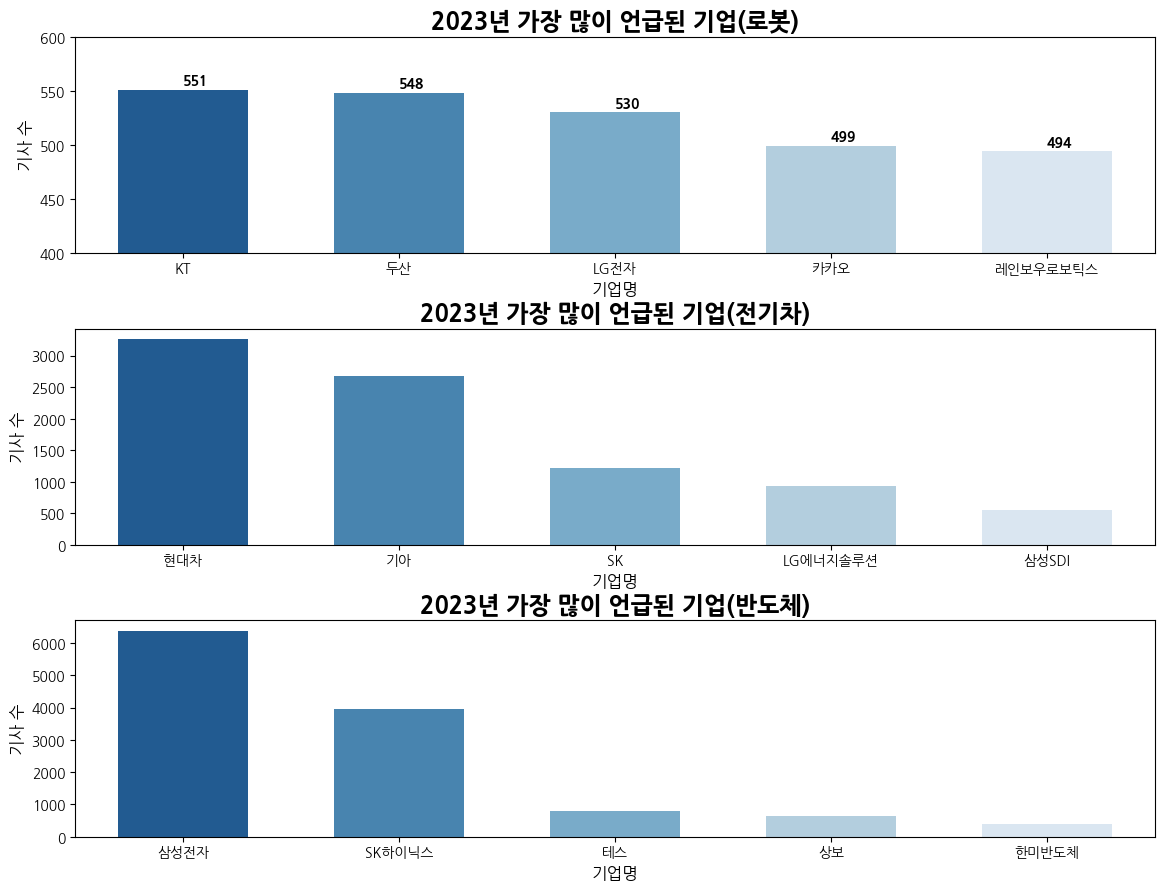

In [14]:
# 산업별 가장 많이 언급된 기업 Top 5

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(12,10))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
plt.subplot(3,1,1)
sns.barplot(x = ddf1.index[:5], y = ddf1["no_article"][:5], width = .6, palette="Blues_r")

plt.text(0, ddf1["no_article"][0]+5, ddf1["no_article"][0], weight = "bold")
plt.text(1, ddf1["no_article"][1]+5, ddf1["no_article"][1], weight = "bold")
plt.text(2, ddf1["no_article"][2]+5, ddf1["no_article"][2], weight = "bold")
plt.text(3, ddf1["no_article"][3]+5, ddf1["no_article"][3], weight = "bold")
plt.text(4, ddf1["no_article"][4]+5, ddf1["no_article"][4], weight = "bold")

plt.xlabel("기업명", fontsize = 12)
plt.ylabel("기사 수", fontsize = 12)
plt.ylim(400, 600)
plt.title("2023년 가장 많이 언급된 기업(로봇)", fontsize = 17, weight = "bold")

plt.subplot(3,1,2)
sns.barplot(x = ddf2.index[:5], y = ddf2["no_article"][:5], width = .6, palette="Blues_r")
plt.xlabel("기업명", fontsize = 12)
plt.ylabel("기사 수", fontsize = 12)
plt.title("2023년 가장 많이 언급된 기업(전기차)", fontsize = 17, weight = "bold")

plt.subplot(3,1,3)
sns.barplot(x = ddf3.index[:5], y = ddf3["no_article"][:5], width = .6, palette="Blues_r")
plt.xlabel("기업명", fontsize = 12)
plt.ylabel("기사 수", fontsize = 12)
plt.title("2023년 가장 많이 언급된 기업(반도체)", fontsize = 17, weight = "bold")


## 로봇 사업 경향
---
### 언급이 가장 많이 된 5개의 기업 주가 데이터 시각화

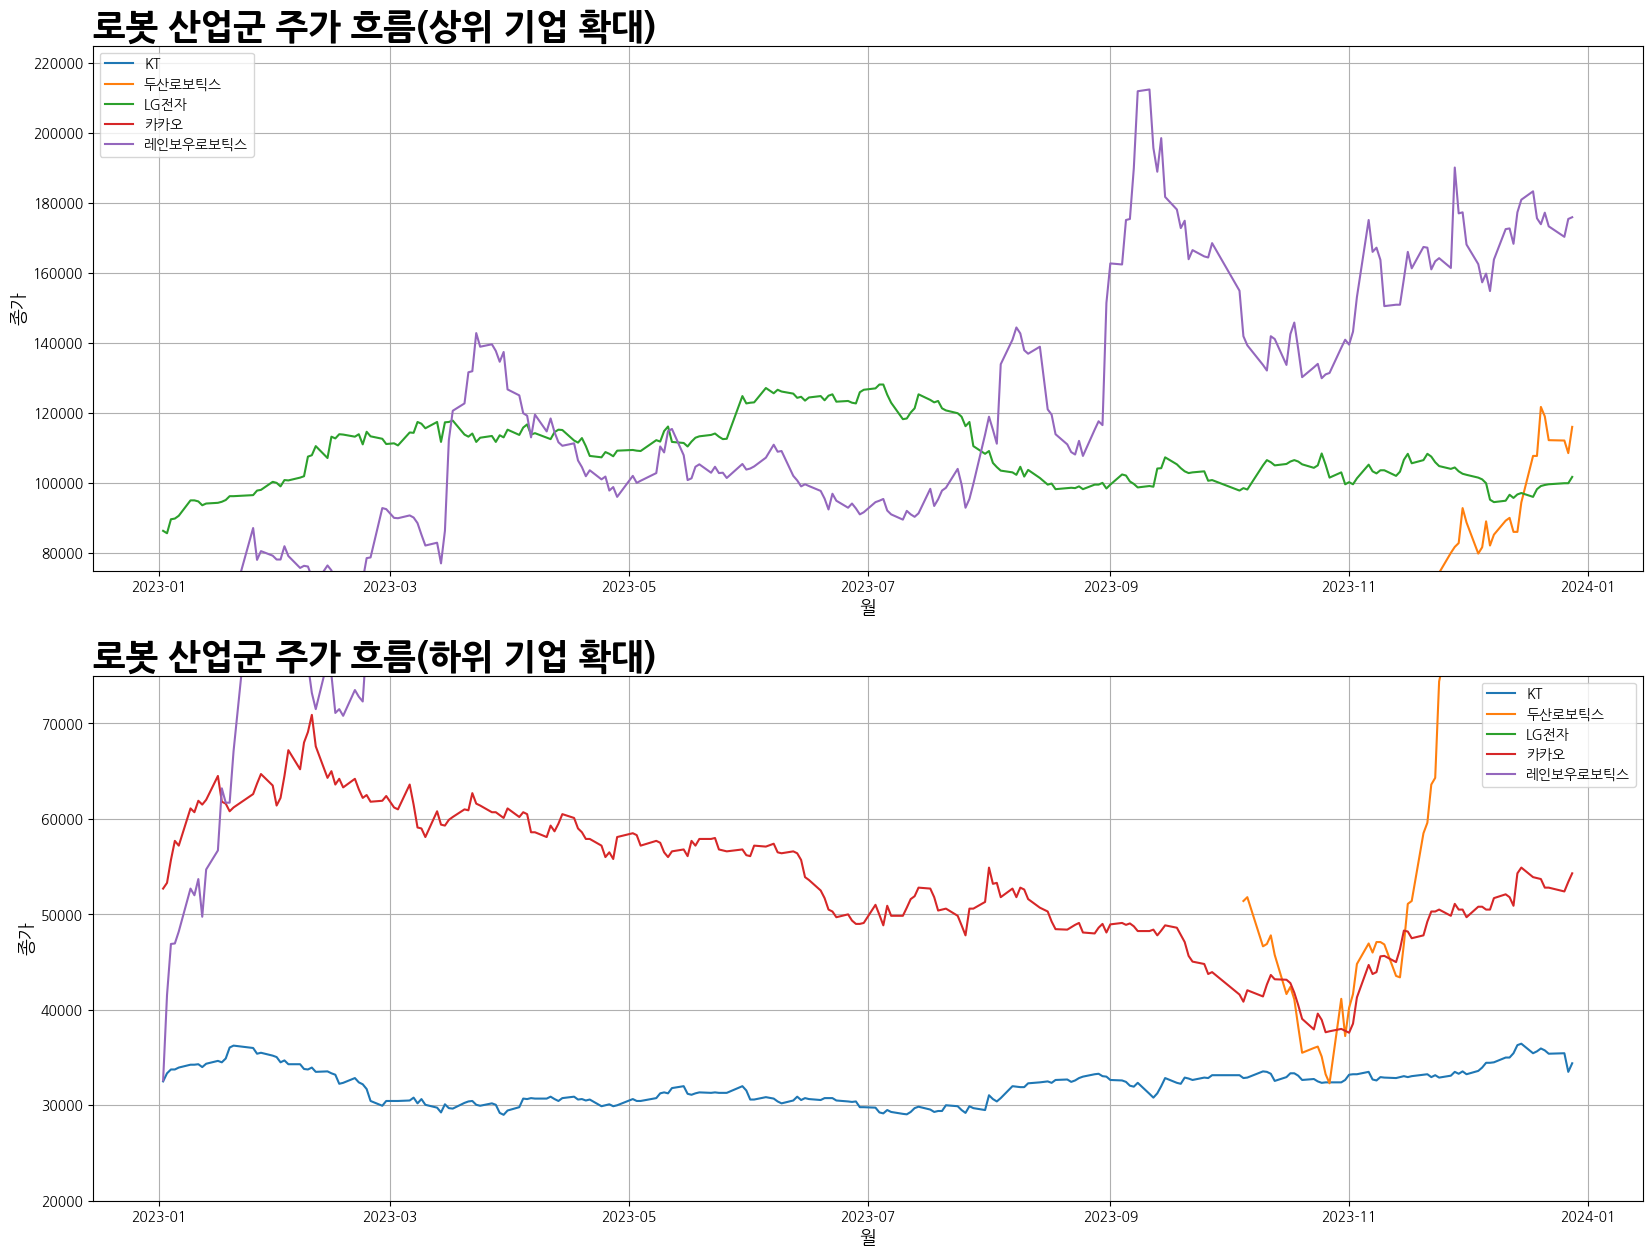

In [21]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

    
class get_stock_data:
    def __init__(self, code, start, end):
        self.code = str(code)
        self.start = str(start)
        self.end = str(end)
        self.stock = fdr.DataReader(self.code, self.start, self.end)
        
    def get_data(self):
        # 지정한 종목코드의 주가 데이터
        return self.stock
    
    def get_diff(self):
        # 이전 행과 현재 행 비교(증감 추이 분석)
        return self.stock['Close'].diff() 

    def get_pct(self):
    # 증감 추이 퍼센티지
        return self.stock['Close'].pct_change()
    
    def count_bull(self):
        a1 = self.stock["Close"].pct_change() < 0
        return a1.sum()
        
    def count_bear(self):
        a1 = self.stock["Close"].pct_change() > 0
        return a1.sum()

company_list = ["KT","두산로보틱스","LG전자","카카오", "레인보우로보틱스"]
code_list = ["030200", "454910", "066570", "035720", "277810"]
stock_list = []
for code in code_list:
    b = get_stock_data(code, "2023", "2024").stock
    b = b["Close"]
    stock_list.append(b)
    
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])
plt.title("로봇 산업군 주가 흐름(상위 기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(75000, 225000)
plt.legend(loc = "upper left")
plt.grid()


plt.subplot(2, 1, 2)
for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])
plt.title("로봇 산업군 주가 흐름(하위 기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(20000, 75000)
plt.legend()
plt.grid()

plt.show()


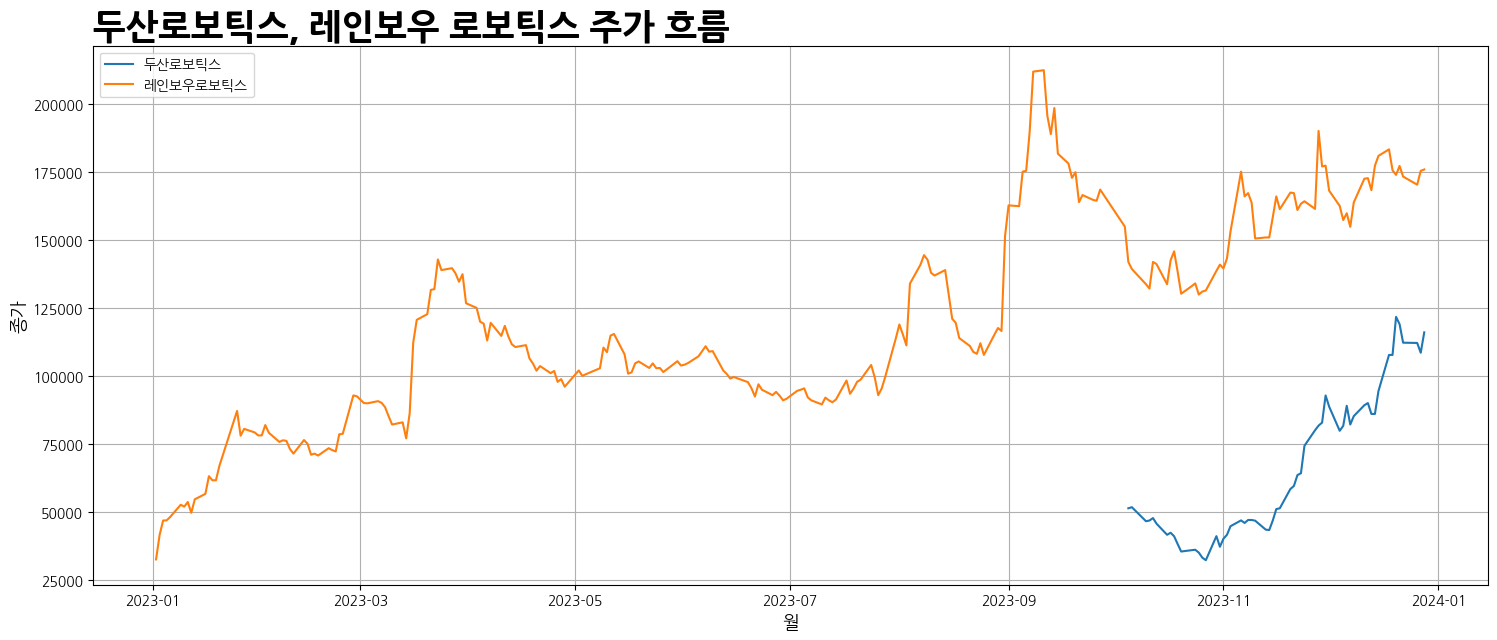

In [22]:
plt.figure(figsize=(18, 7))
plt.plot(stock_list[1], label = company_list[1])
plt.plot(stock_list[4], label = company_list[4])
plt.title("두산로보틱스, 레인보우 로보틱스 주가 흐름", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.legend(loc = "upper left")
plt.grid()
plt.show()

## 전기차 사업 경향

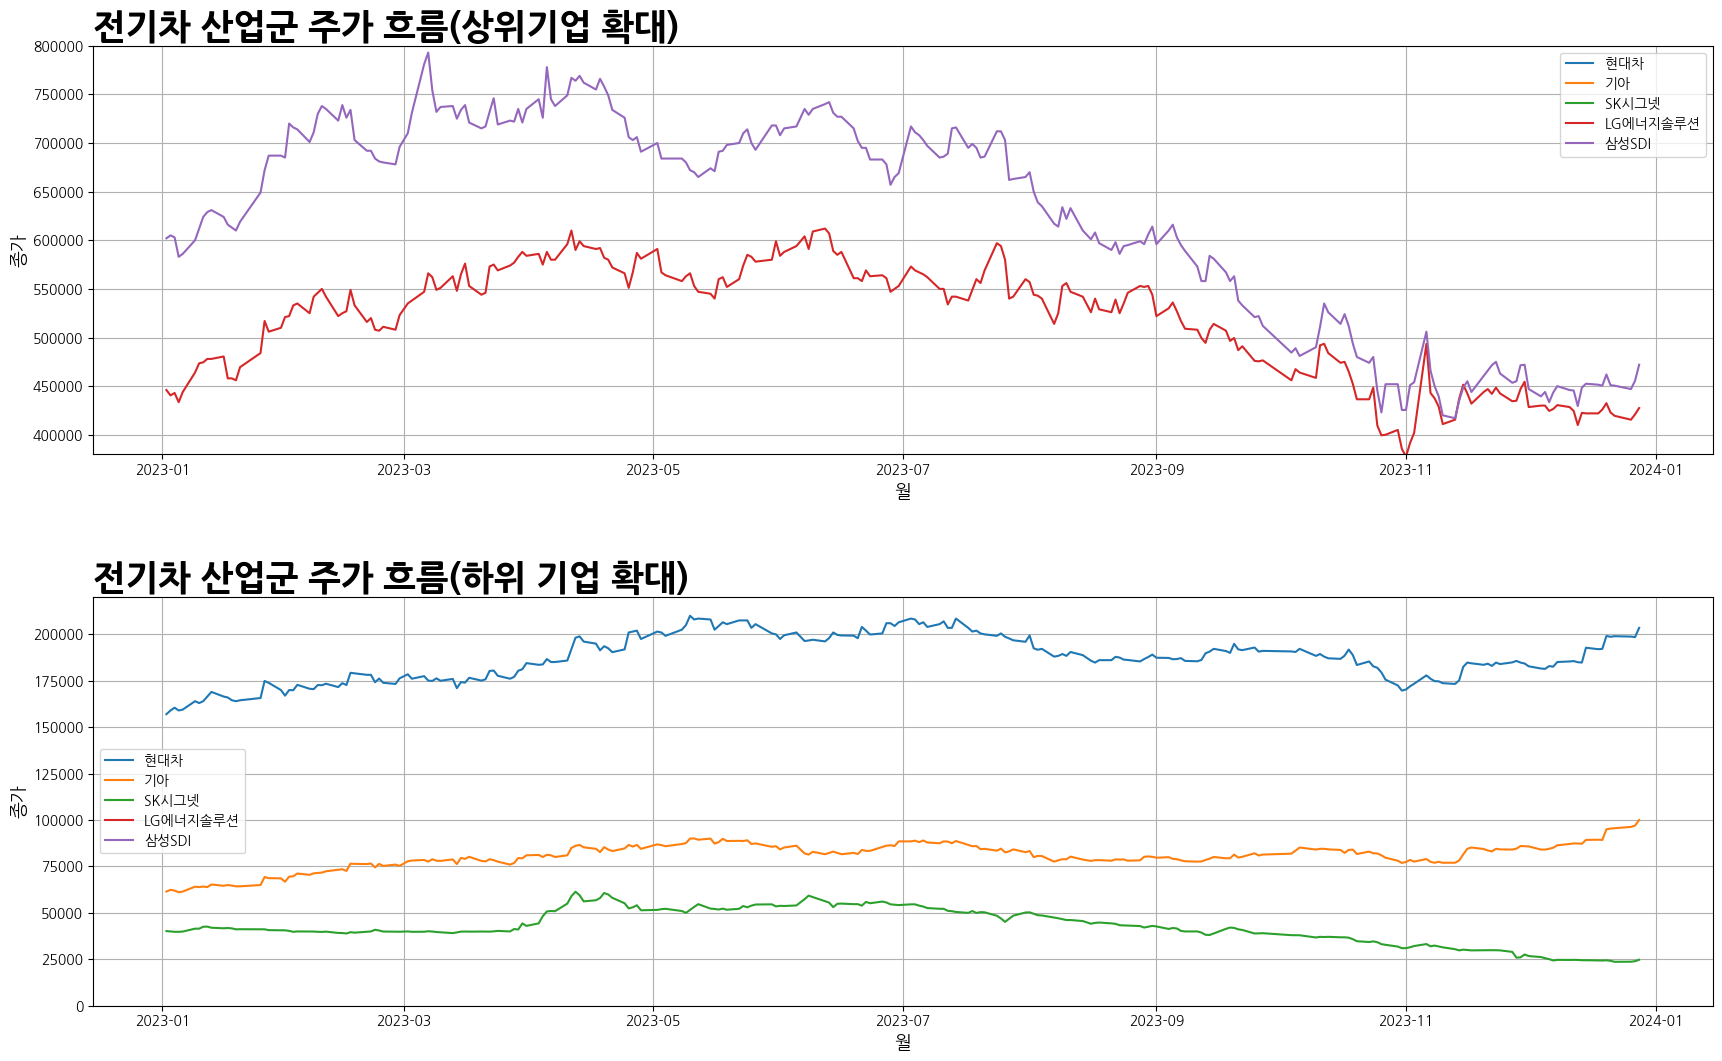

In [19]:
company_list = ["현대차", "기아", "SK시그넷", "LG에너지솔루션", "삼성SDI"]
code_list = ["005380", "000270", "260870","373220","006400"]
stock_list = []
for code in code_list:
    b = get_stock_data(code, "2023", "2024").stock
    b = b["Close"]
    stock_list.append(b)
    
plt.figure(figsize=(18, 12))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
plt.subplot(2, 1, 1)

for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])
    
plt.title("전기차 산업군 주가 흐름(상위기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(380000, 800000)
plt.legend()
plt.grid()


plt.subplot(2, 1, 2)

for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])
    
plt.title("전기차 산업군 주가 흐름(하위 기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(0, 220000)
plt.legend()
plt.grid()

plt.show()

## 반도체 사업 경향

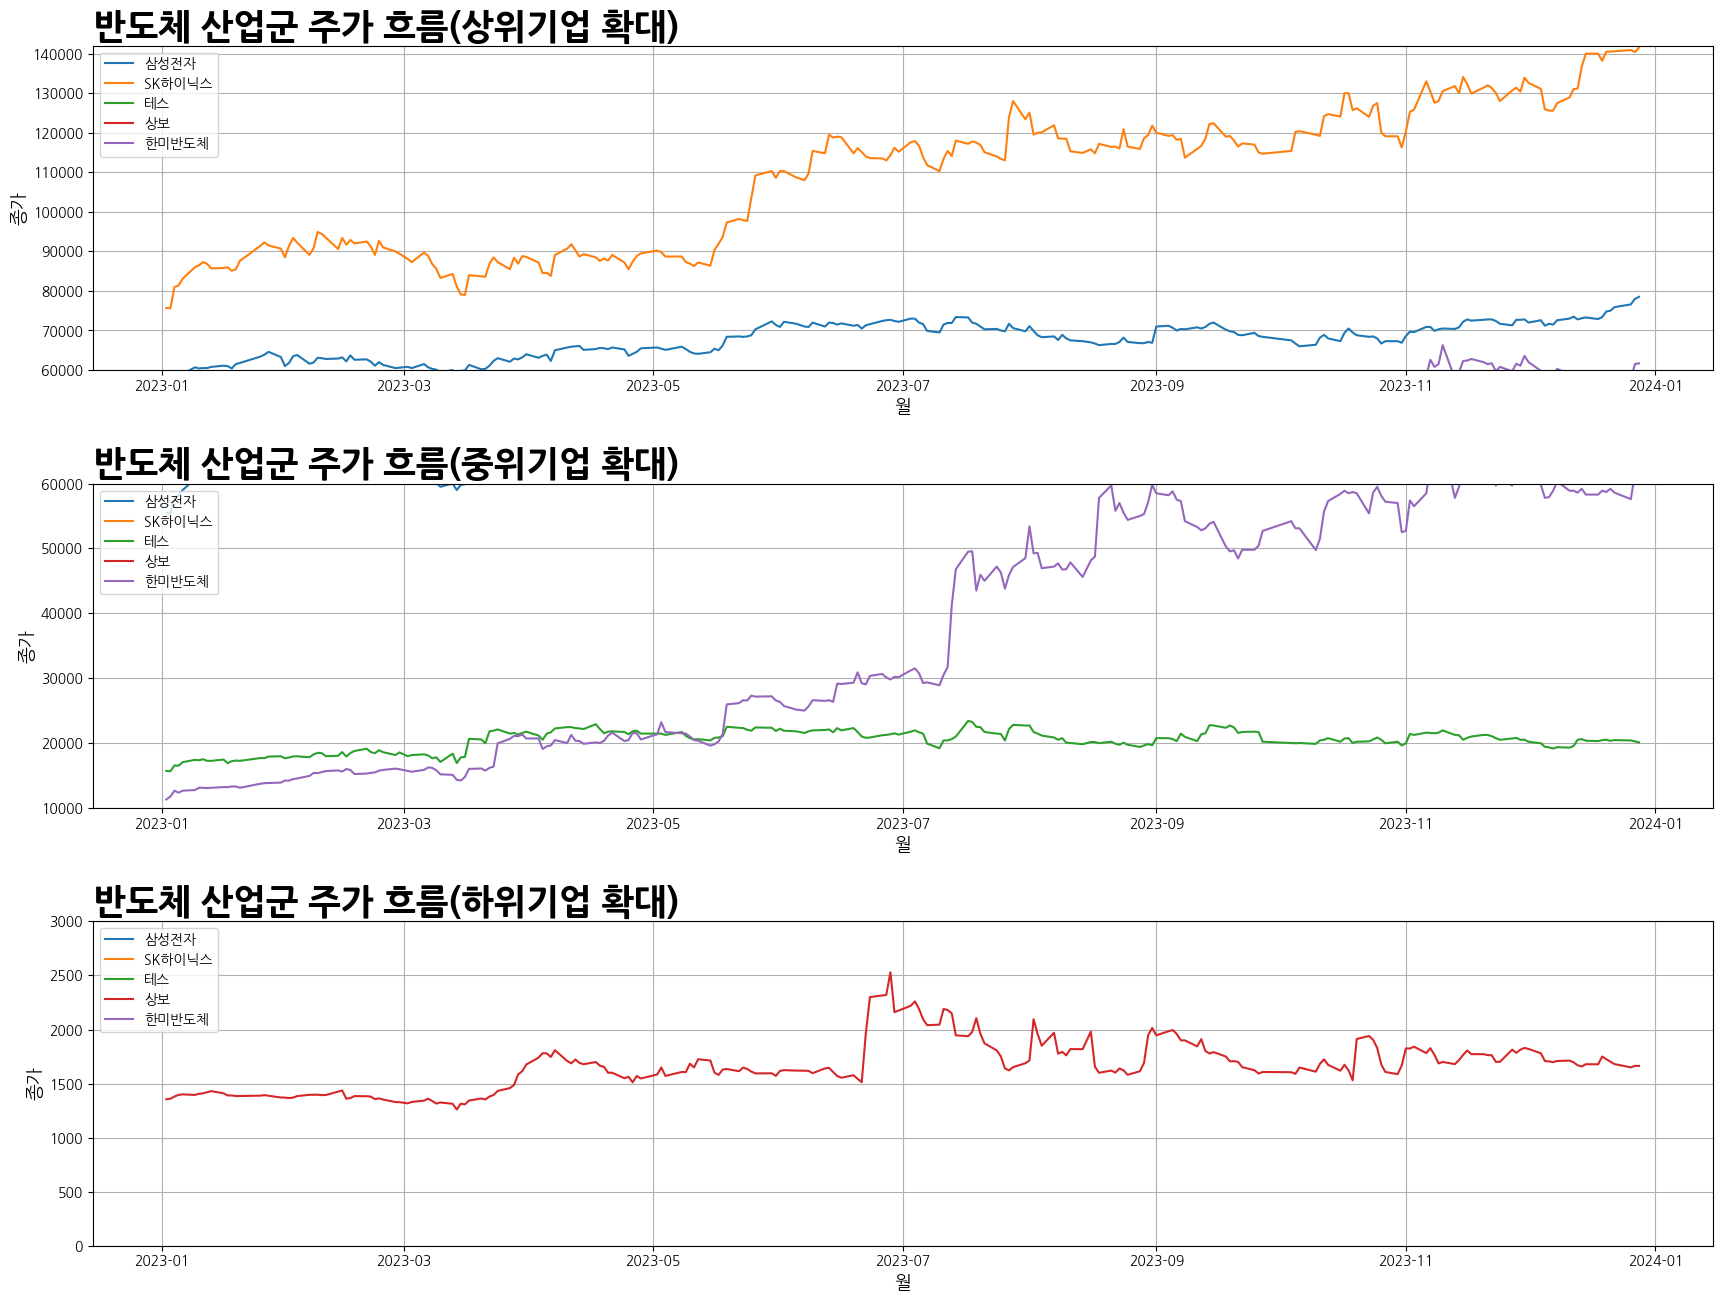

In [26]:
company_list = ["삼성전자", "SK하이닉스", "테스", "상보", "한미반도체"]
code_list = ["005930", "000660", "095610", "027580", "042700"]
stock_list = []
for code in code_list:
    b = get_stock_data(code, "2023", "2024").stock
    b = b["Close"]
    stock_list.append(b)
    
plt.figure(figsize=(18, 15))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)

plt.subplot(3, 1, 1)
for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])

plt.title("반도체 산업군 주가 흐름(상위기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(60000, 142000)
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])

plt.title("반도체 산업군 주가 흐름(중위기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(10000, 60000)
plt.legend(loc = "upper left")
plt.grid()


plt.subplot(3, 1, 3)
for i, stock in enumerate(stock_list):
    plt.plot(stock, label = company_list[i])

plt.title("반도체 산업군 주가 흐름(하위기업 확대)", fontsize =25, weight = "bold", loc = "left")
plt.xlabel("월", fontsize = 13)
plt.ylabel("종가", fontsize = 13)
plt.ylim(0, 3000)
plt.legend(loc = "upper left")
plt.grid()

plt.show()